In [3]:
# Importing all the dependencies

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [4]:
# Loading the titanic dataset
dataset = 'titanic-data.csv'
df = pd.read_csv(dataset)

df['Gender'] = df['Sex'].map({'female':0,'male':1})

# Lets create a boolean list to store the missing values in the Age column
missing_age = pd.isnull(df['Age'])
missing_age_female = df[missing_age]['Sex'] == 'female'
missing_age_male = df[missing_age]['Sex'] == 'male'

#print 'There are',missing_age_female.sum(), 'values missing from the Age column for Females and', missing_age_male.sum(), 'values missing for males.'

# Replacing the NaN's with the median and storing in a new column
df['All_Age'] = df[['Age']].applymap(lambda x: df['Age'].median() if pd.isnull(x) else x)

# add has cabin
df['Has_Cabin'] = df[['Cabin']].applymap(lambda x: 0 if pd.isnull(x) else 1)

# Lets create a boolean list to store the missing values in the Embarked column
missing_embarked = pd.isnull(df['Embarked'])

# Creating a boolean list of first class passengers
first_class = df["Pclass"] == 1

# Parameters for our pandas.pivot_table aggfunc
func_param = [np.mean, np.median ,np.std, np.size, np.max, np.min]

# Creating a pivot table with the statistics of all three ports of Embarkation
df[first_class].pivot_table(values='Fare', index='Embarked',aggfunc=func_param)

df.loc[61, 'Embarked'] = 'C'
df.loc[829, 'Embarked'] = 'C'

# Creating new column Family_Size
df['Family_Size']=df['SibSp']+df['Parch']

# Lets print first few columns of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,All_Age,Has_Cabin,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,38.0,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,26.0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,35.0,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,35.0,0,0


In [5]:
df.groupby(['Survived', 'Sex']).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Survived Sex                                                                  
0        female           81      81    81   64     81     81      81    81   
         male            468     468   468  360    468    468     468   468   
1        female          233     233   233  197    233    233     233   233   
         male            109     109   109   93    109    109     109   109   

                 Cabin  Embarked  Gender  All_Age  Has_Cabin  Family_Size  
Survived Sex                                                               
0        female      6        81      81       81         81           81  
         male       62       468     468      468        468          468  
1        female     91       233     233      233        233          233  
         male       45       109     109      109        109          109

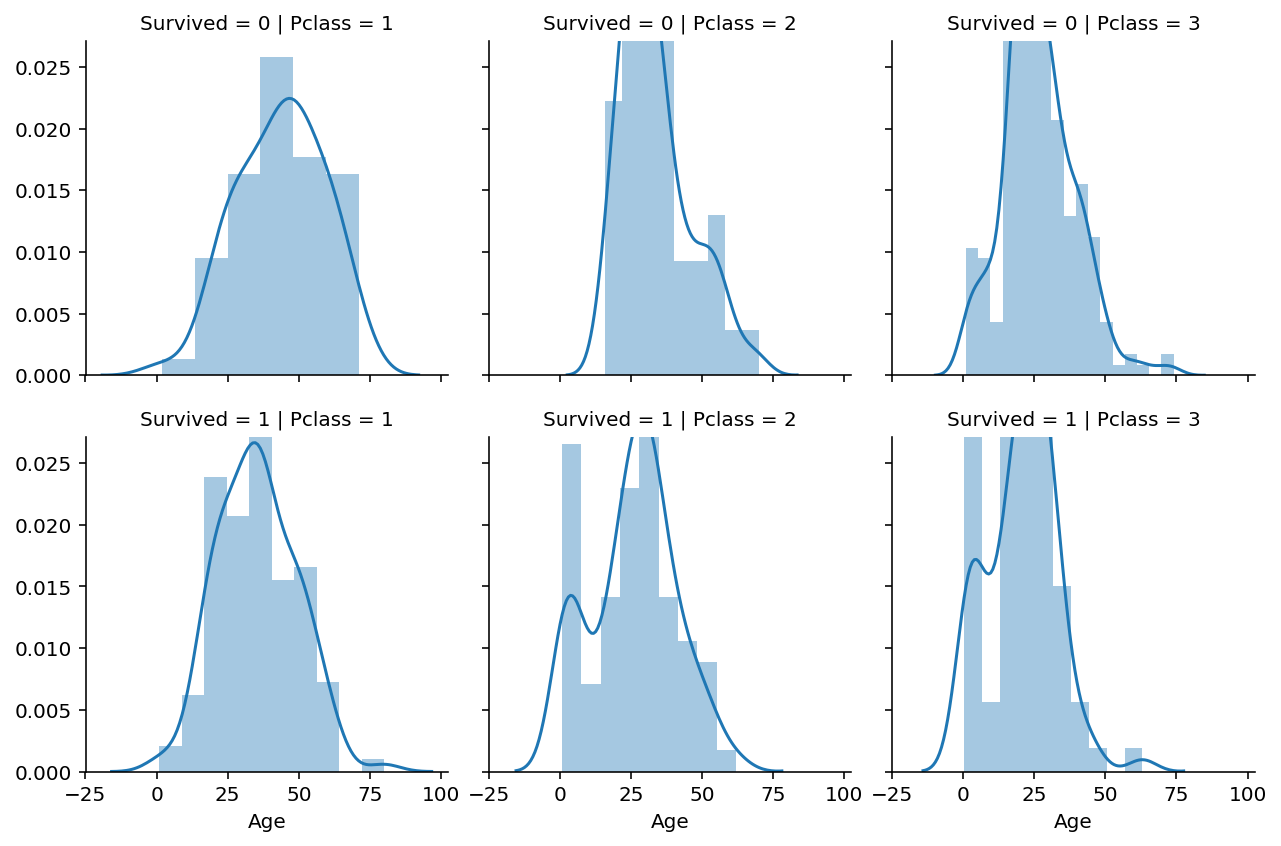

In [6]:
g = sns.FacetGrid(df, row='Survived', col='Pclass')
g.map(sns.distplot, "Age")

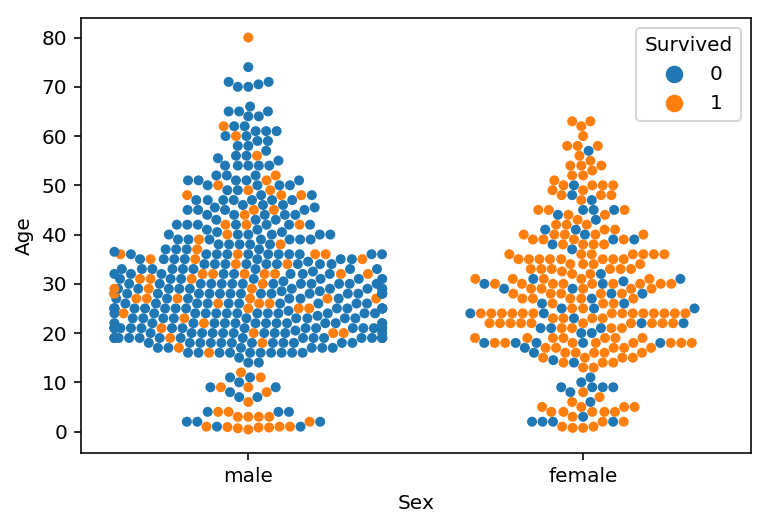

In [7]:
sns.swarmplot(x ='Sex', y='Age', data=df, hue='Survived')

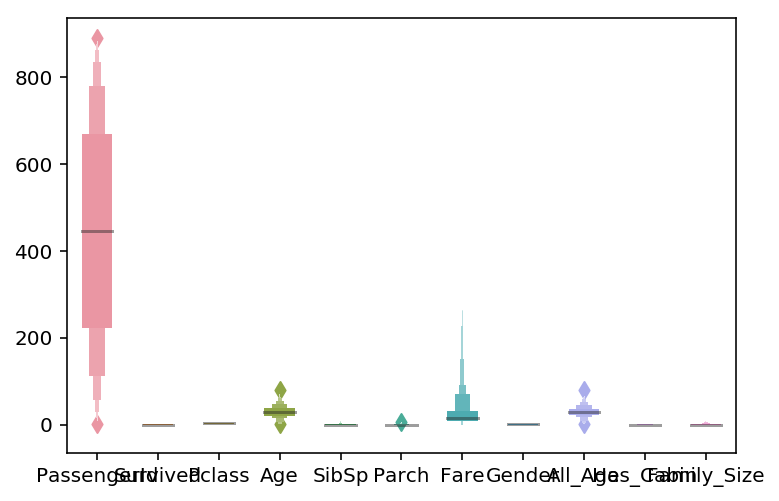

In [8]:
sns.lvplot(data=df, width=.5) #similar to boxplot

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   
Gender          0.042939 -0.543351  0.131900  0.093254 -0.114631 -0.245489   
All_Age         0.034212 -0.064910 -0.339898  1.000000 -0.233296 -0.172482   
Has_Cabin       0.019919  0.316912 -0.725541  0.249732 -0.040460  0.036987   
Family_Size    -0.040143  0.016639  0.065997 -0.301914  0.890712  0.783111   

                 Fare    Gender   All_Age  Has_Cabin  Family_Si

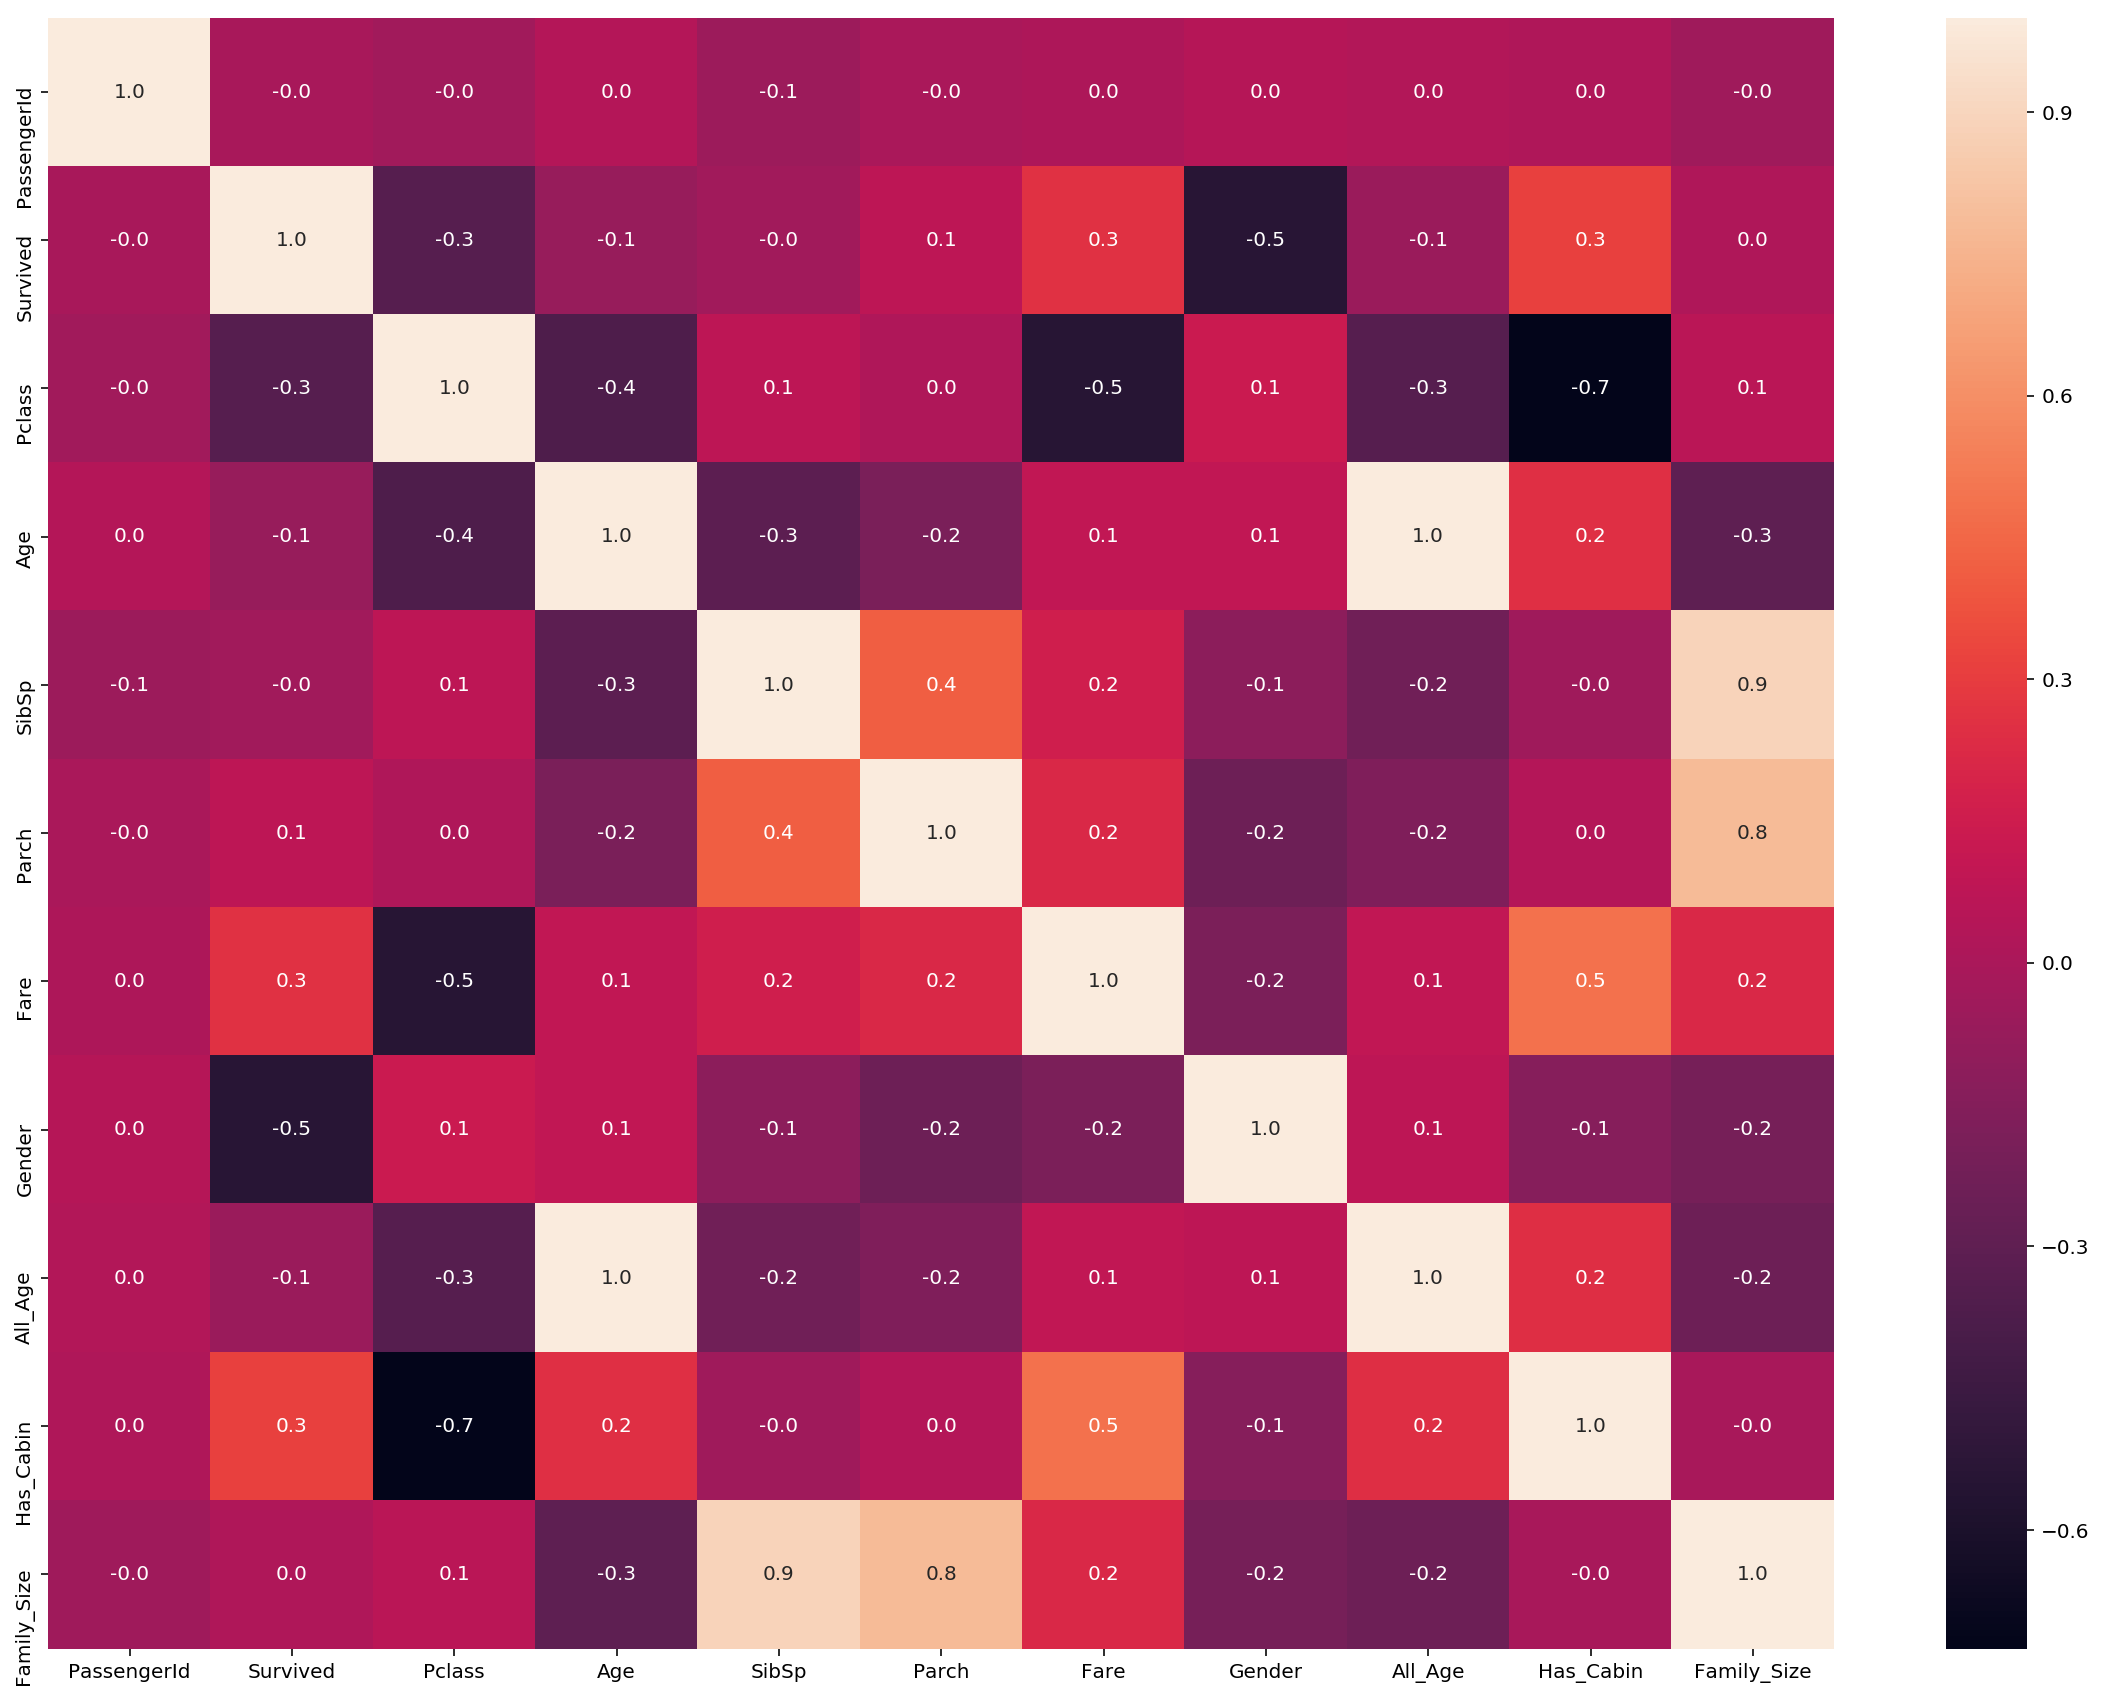

In [188]:
corr = df.corr(method='pearson')
print(corr)
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, fmt=".1f")

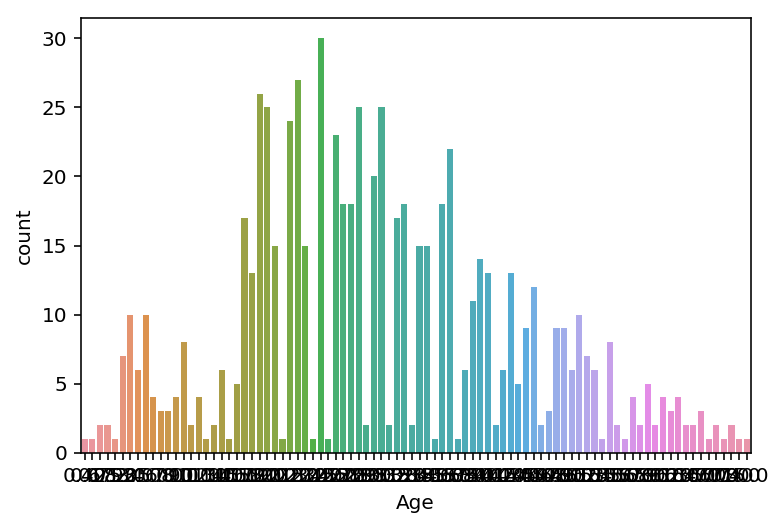

In [10]:
sns.countplot(x='Age', data=df)

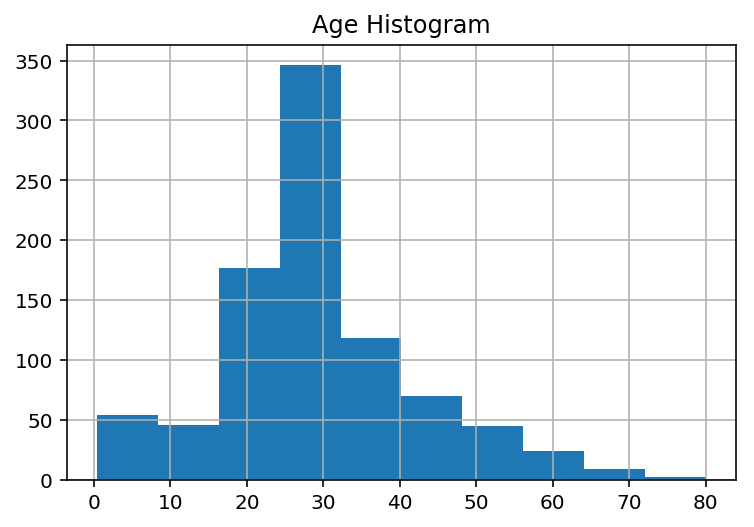

In [11]:
# Plot the Age histogram
df['All_Age'].hist()
plt.title('Age Histogram')

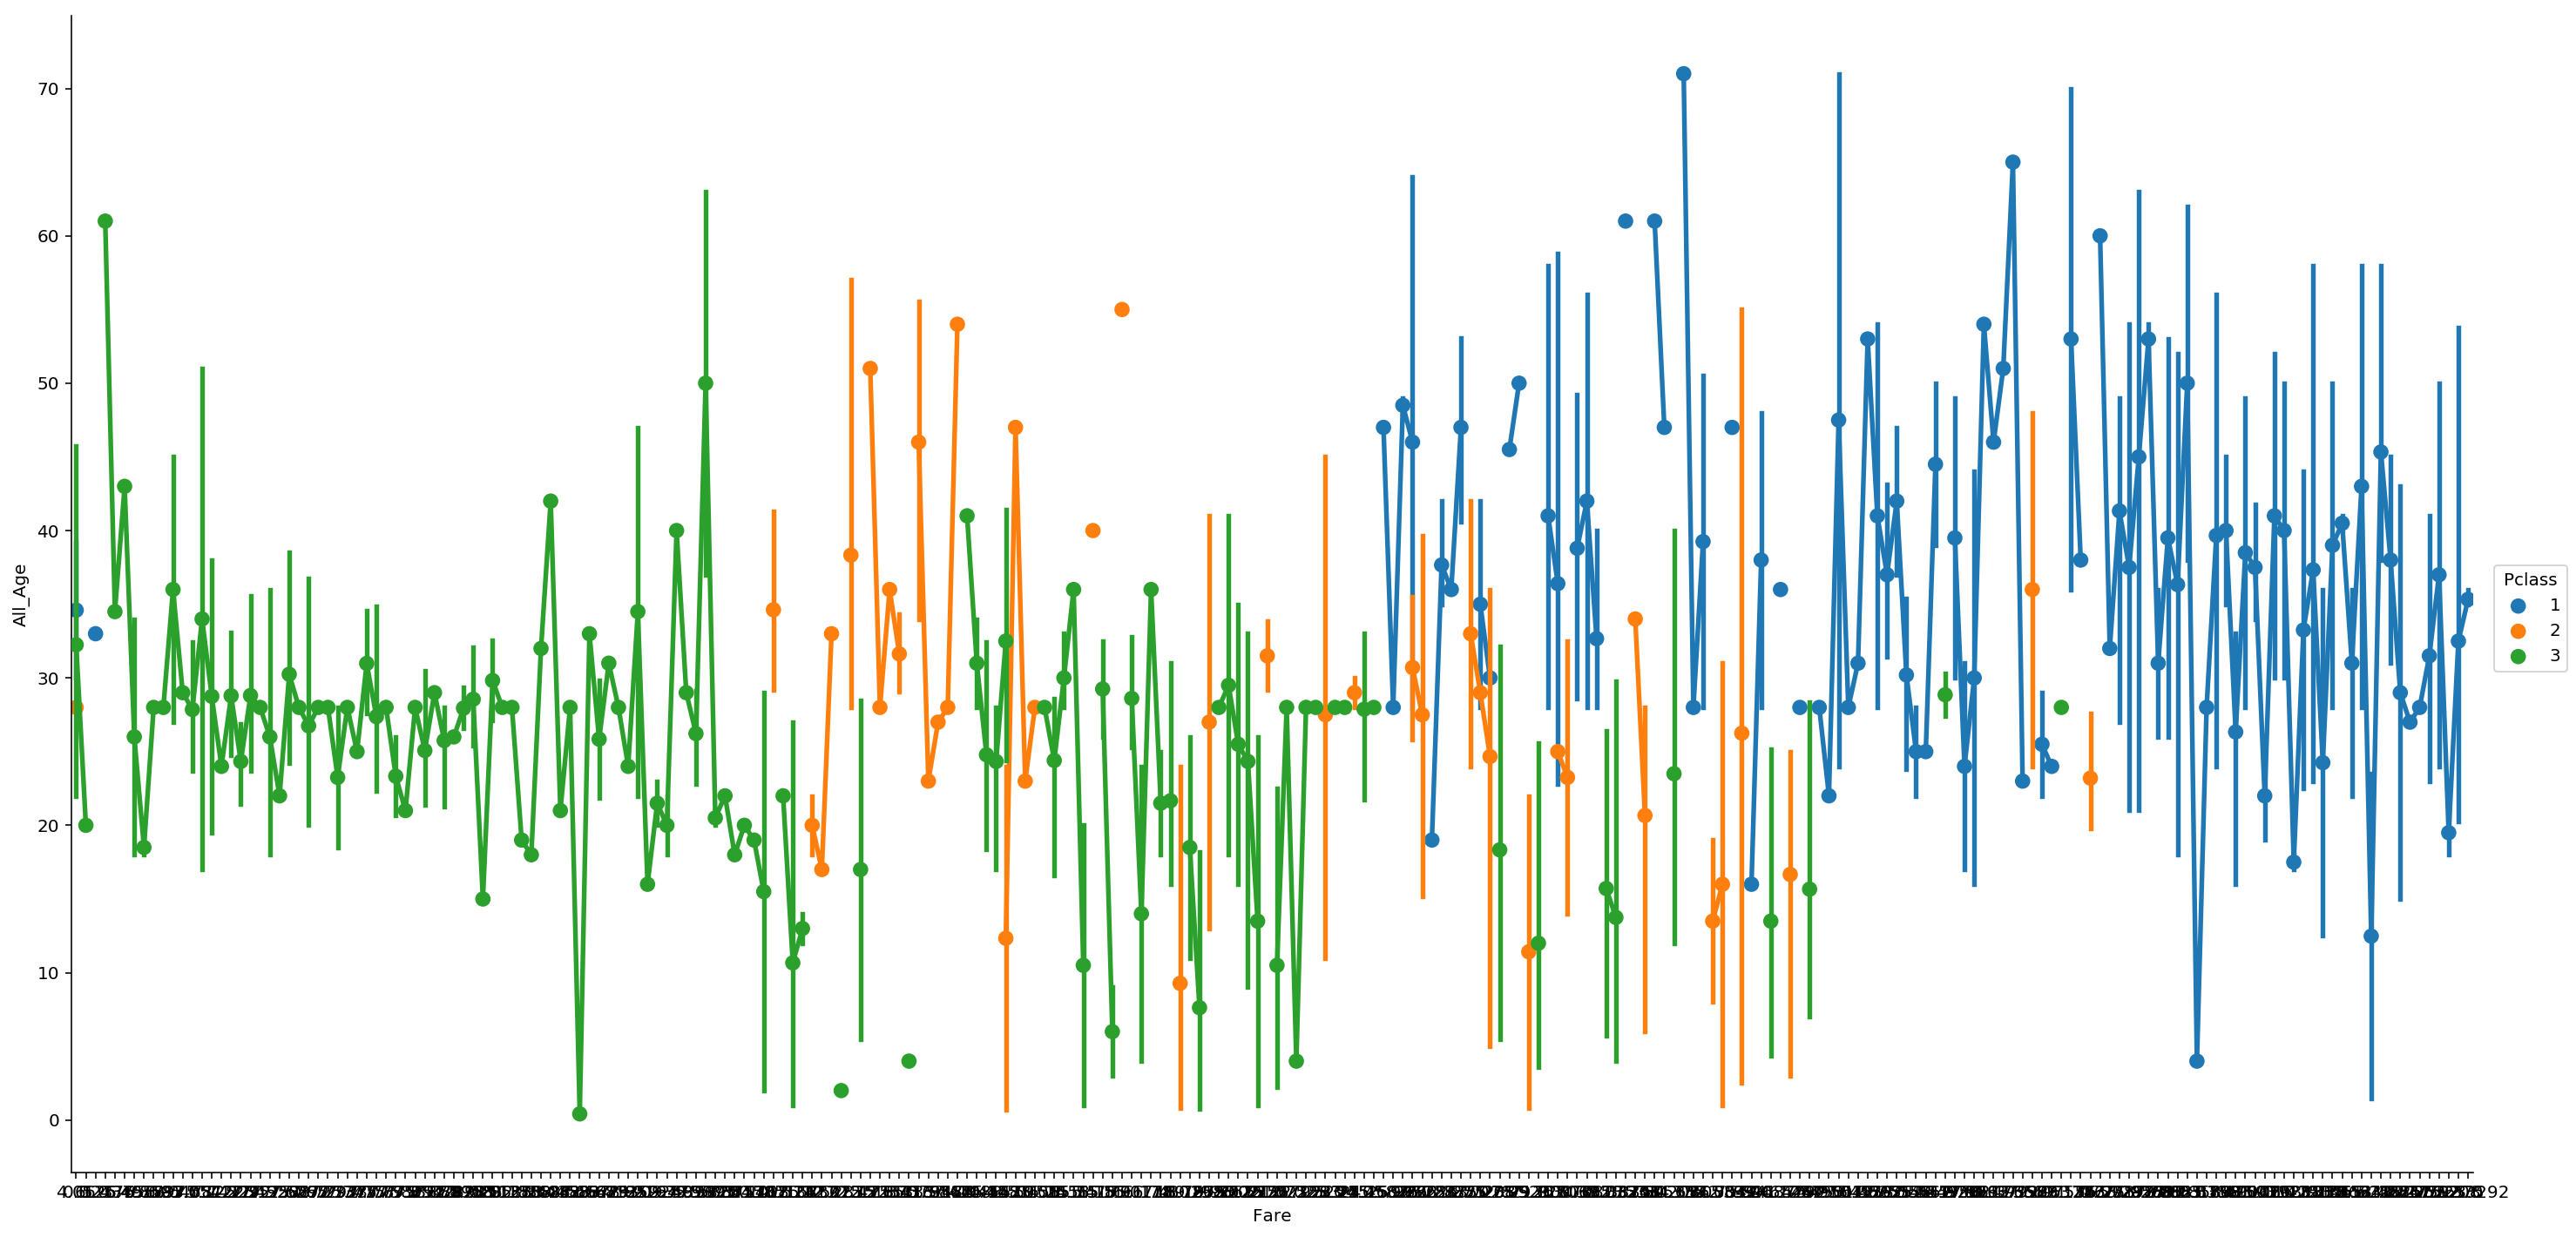

In [12]:
sns.factorplot(x="Fare", y="All_Age", hue="Pclass", data=df, size=10, aspect=2)

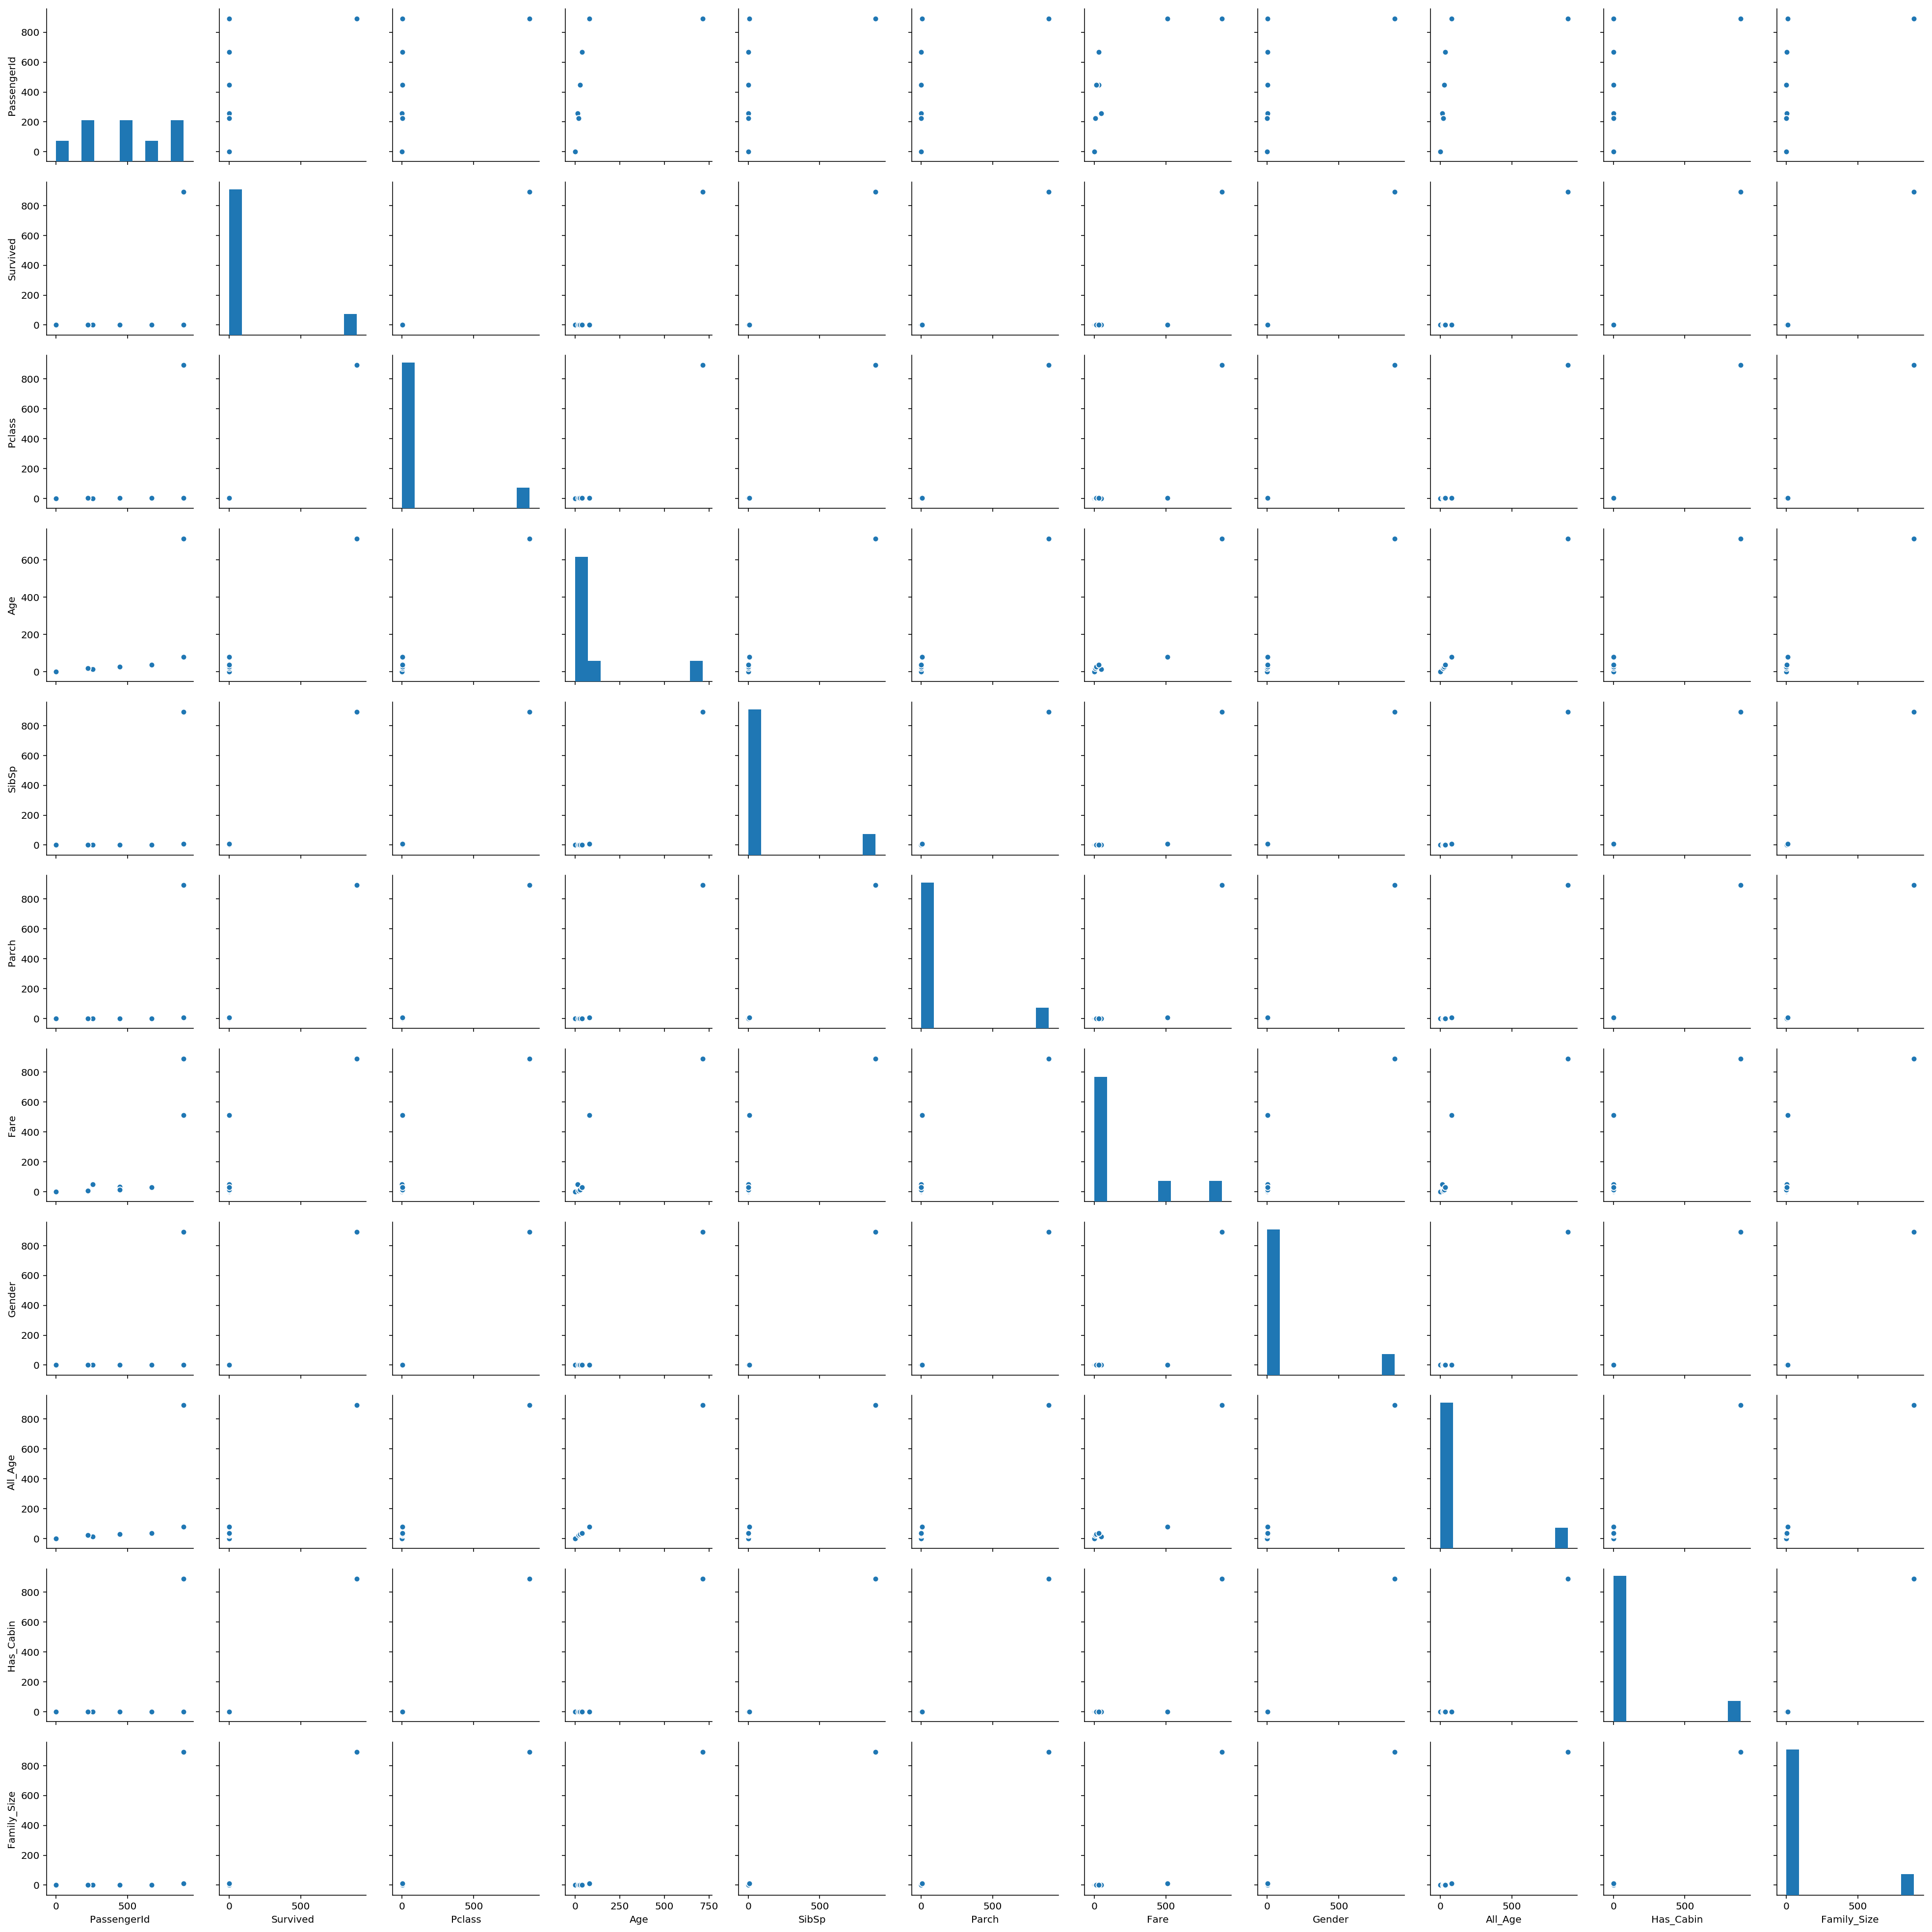

In [13]:
sns.pairplot(df.describe())

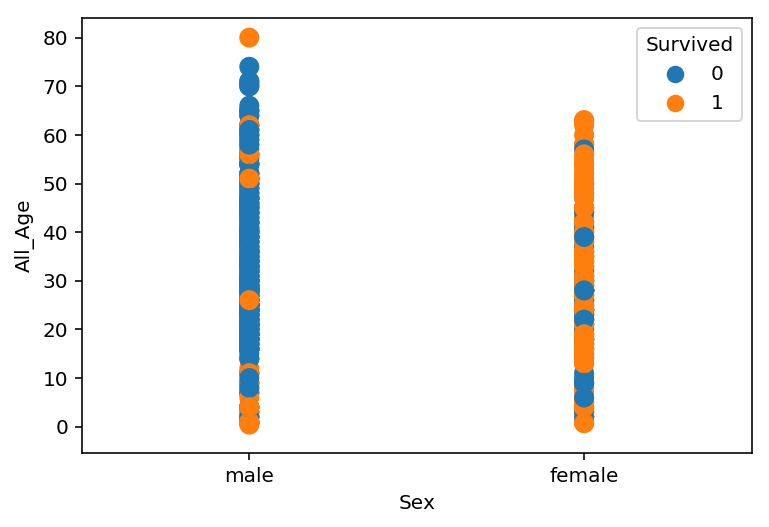

In [14]:
sns.stripplot(x="Sex", y="All_Age",hue="Survived",size=10, data=df)

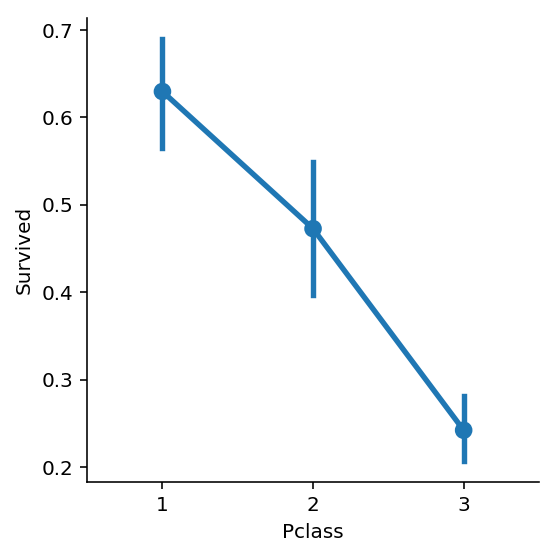

In [15]:
sns.factorplot(x="Pclass", y="Survived", data=df)

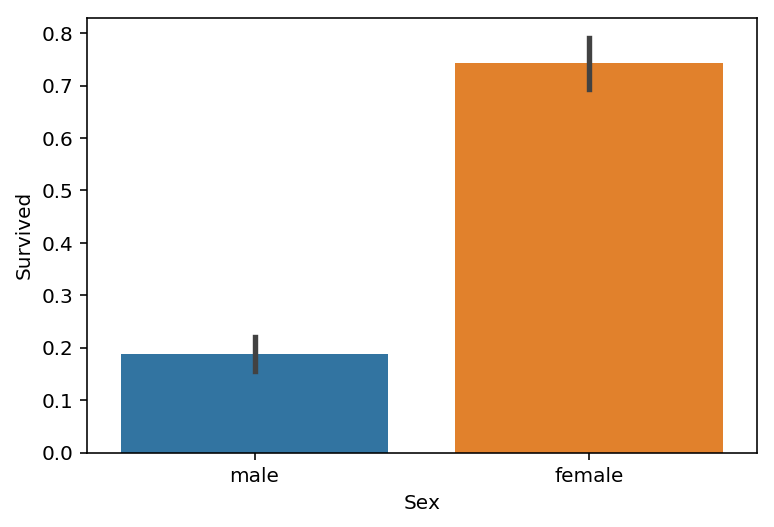

In [16]:
sns.barplot(x='Sex', y='Survived',data=df)

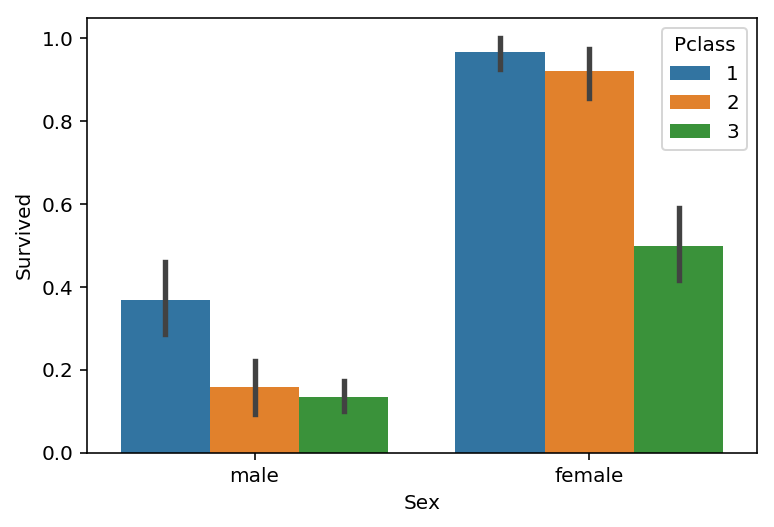

In [17]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df);

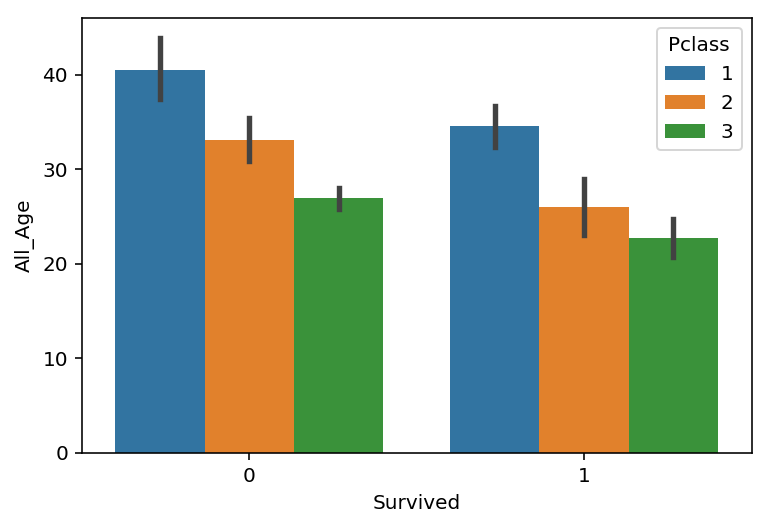

In [18]:
sns.barplot(x="Survived", y="All_Age", hue="Pclass", data=df);

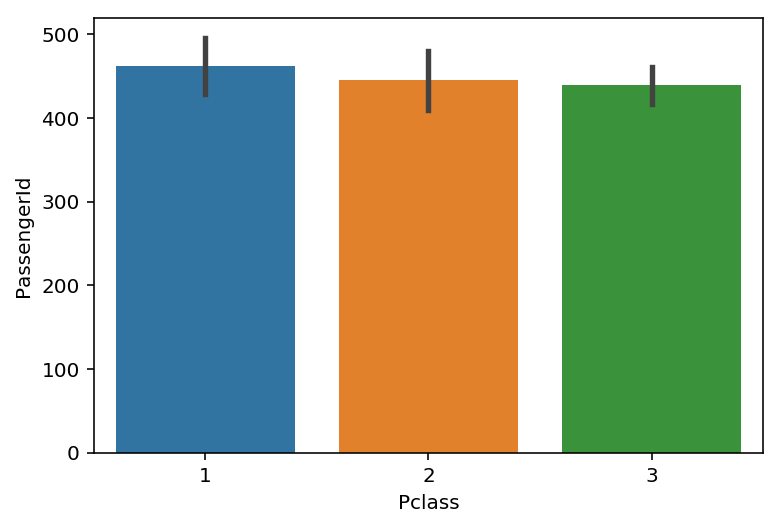

In [20]:
sns.barplot(x="Pclass", y="PassengerId", data=df);

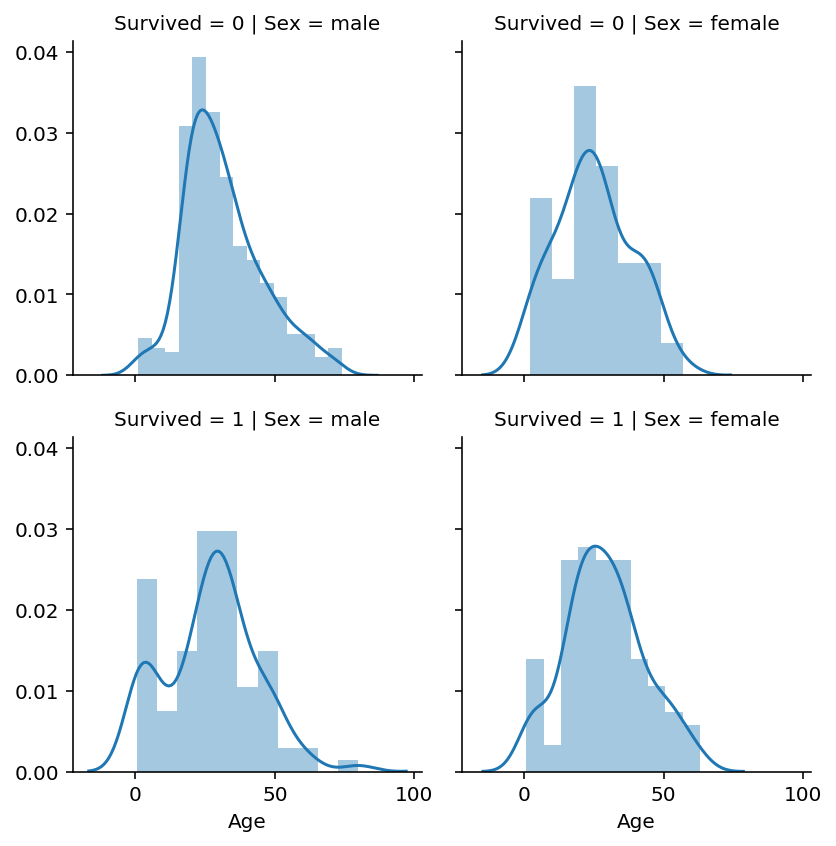

In [27]:
g = sns.FacetGrid(df, row='Survived', col='Sex')
g.map(sns.distplot, "Age")

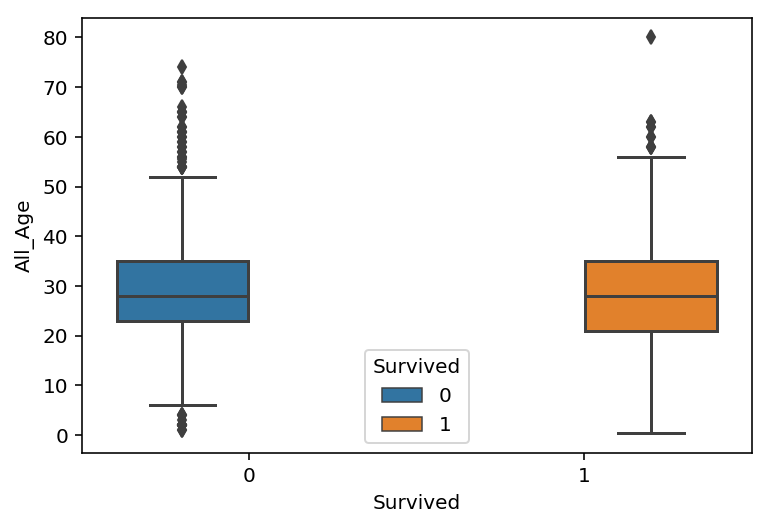

In [35]:
sns.boxplot(x="Survived", y="All_Age",hue="Survived", data=df)

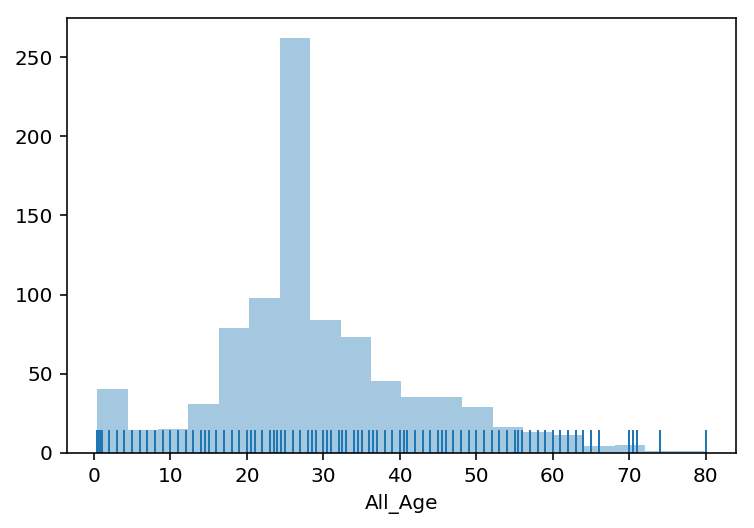

In [44]:
sns.distplot(df.All_Age, bins=20, kde=False, rug=True);

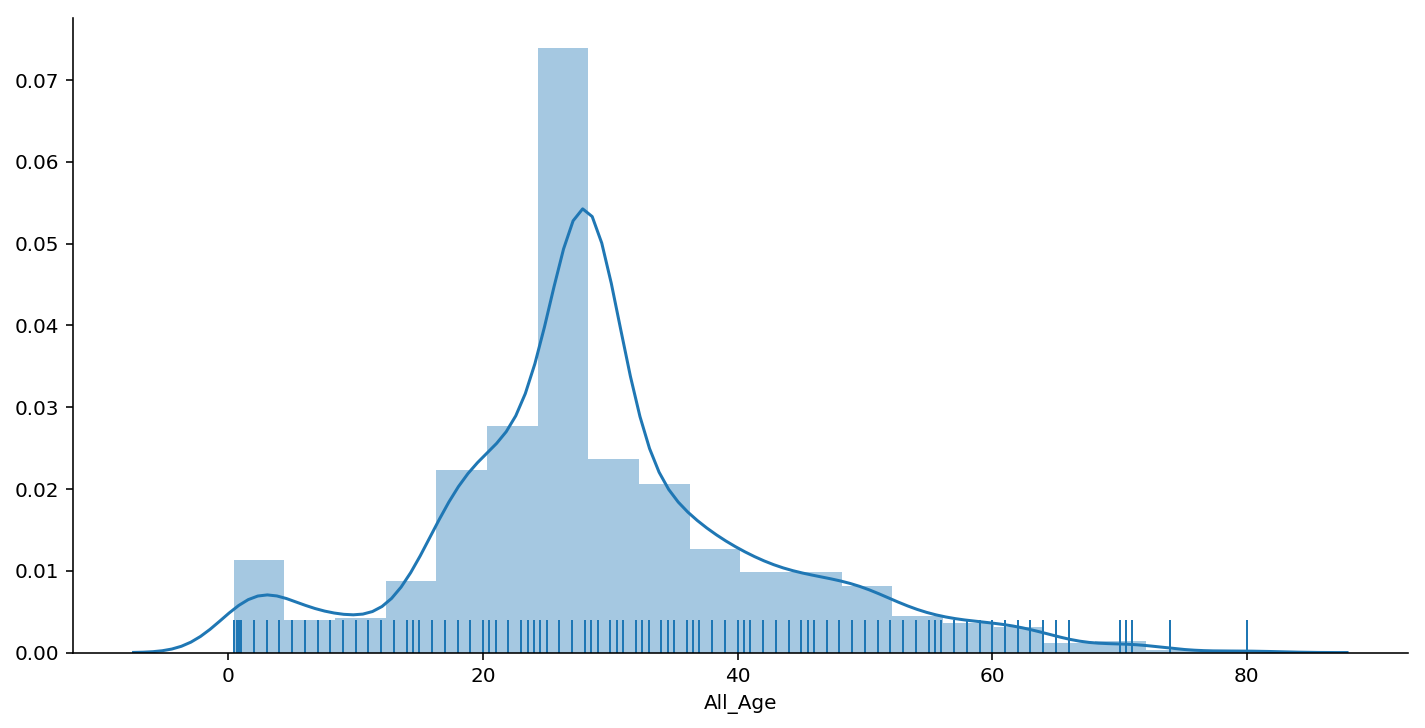

In [56]:
sns.FacetGrid(df, size=5, aspect=2)
sns.distplot(df.All_Age, bins=20, rug=True);

In [78]:
df.corr(min_periods =100)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,All_Age,Has_Cabin,Family_Size
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.042939,0.034212,0.019919,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351,-0.064910,0.316912,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900,-0.339898,-0.725541,0.065997
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254,1.000000,0.249732,-0.301914
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631,-0.233296,-0.040460,0.890712
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489,-0.172482,0.036987,0.783111
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333,0.096688,0.482075,0.217138
Gender,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000,0.081163,-0.140391,-0.200988
All_Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.081163,1.000000,0.240314,-0.245619
Has_Cabin,0.019919,0.316912,-0.725541,0.249732,-0.040460,0.036987,0.482075,-0.140391,0.240314,1.000000,-0.009175


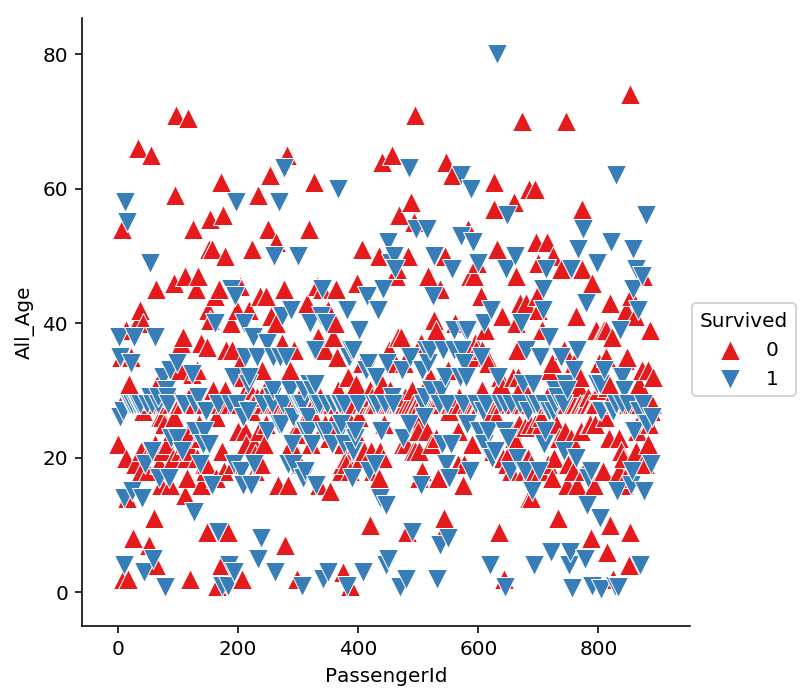

In [86]:
g = sns.FacetGrid(df, hue="Survived", palette="Set1", size=5, hue_kws={"marker": ["^", "v"]})
g.map(plt.scatter, "PassengerId", "All_Age", s=100, linewidth=.5, edgecolor="white")
g.add_legend();

In [95]:
df[df['Survived'] == 1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,All_Age,Has_Cabin,Family_Size
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,38.0,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,26.0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,35.0,1,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,27.0,0,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,14.0,0,1


In [125]:
df[(df.Age>60) & (df.Age<80) & (df.Survived == 1)].Age.count()

4

In [187]:
df.groupby(['Pclass'])['Cabin'].count()

Pclass
1    176
2     16
3     12
Name: Cabin, dtype: int64

In [160]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

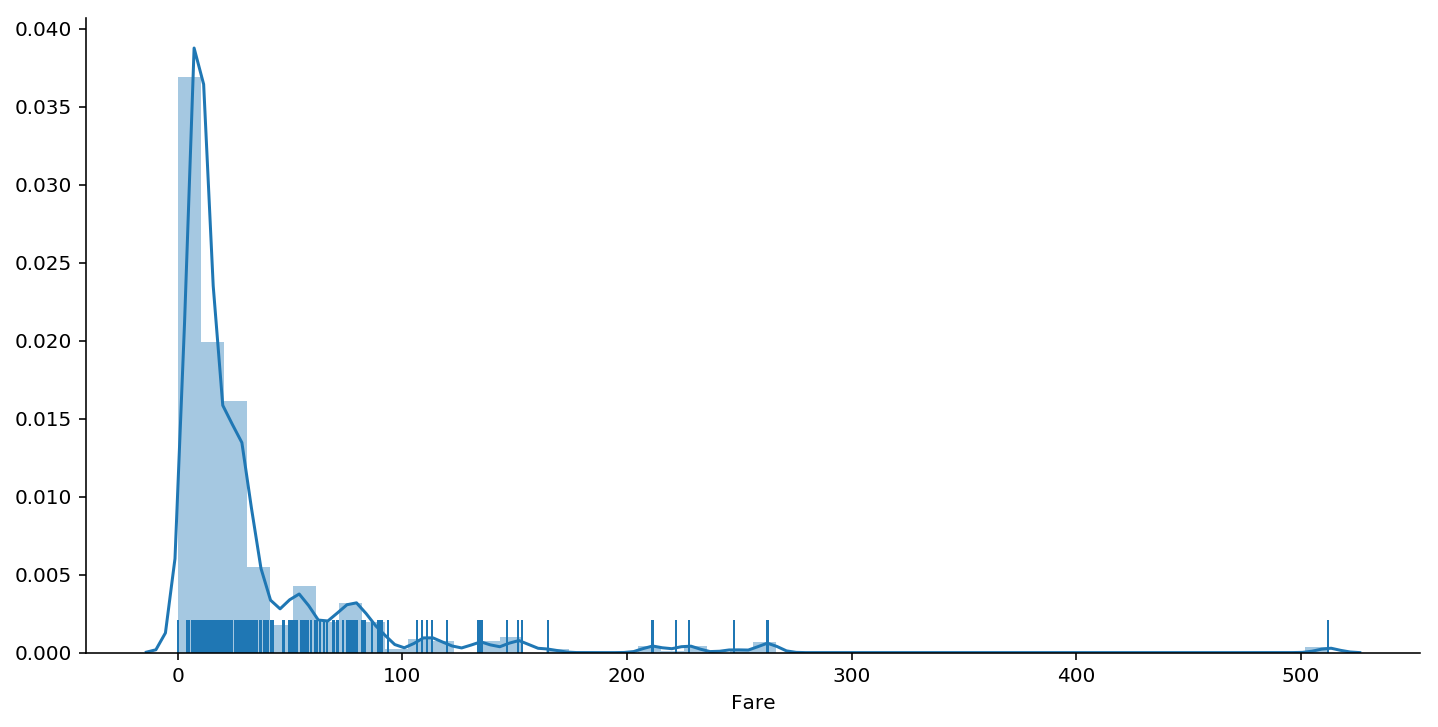

In [181]:
sns.FacetGrid(df, size=5, aspect=2)
sns.distplot(df.Fare, bins=50, rug=True);

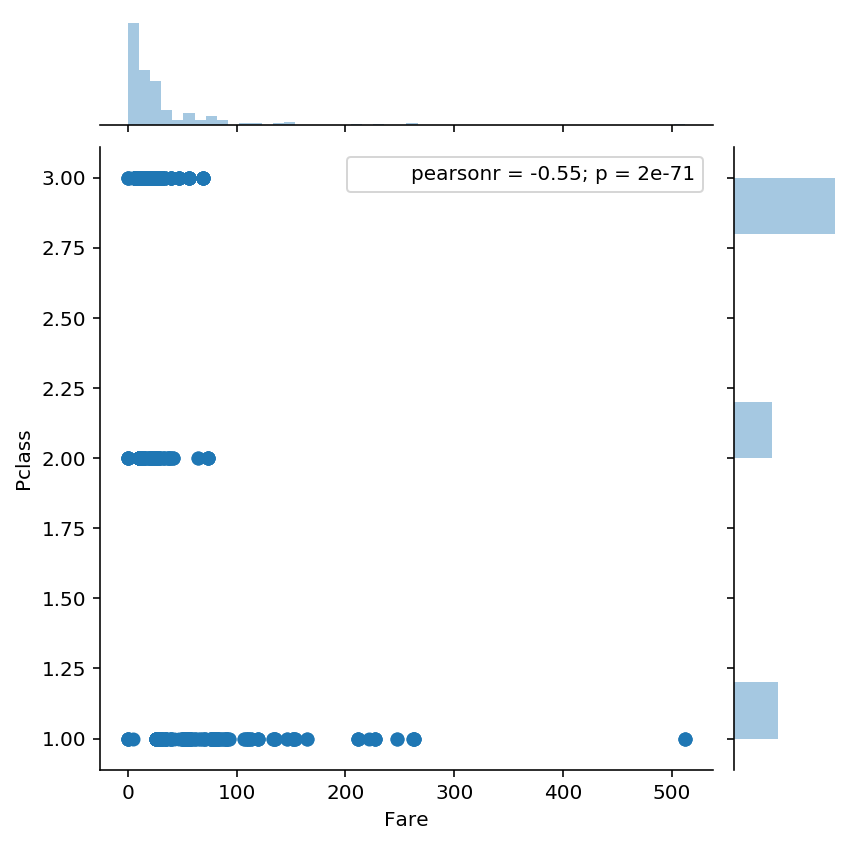

In [182]:
sns.jointplot(x="Fare", y="Pclass", data=df);

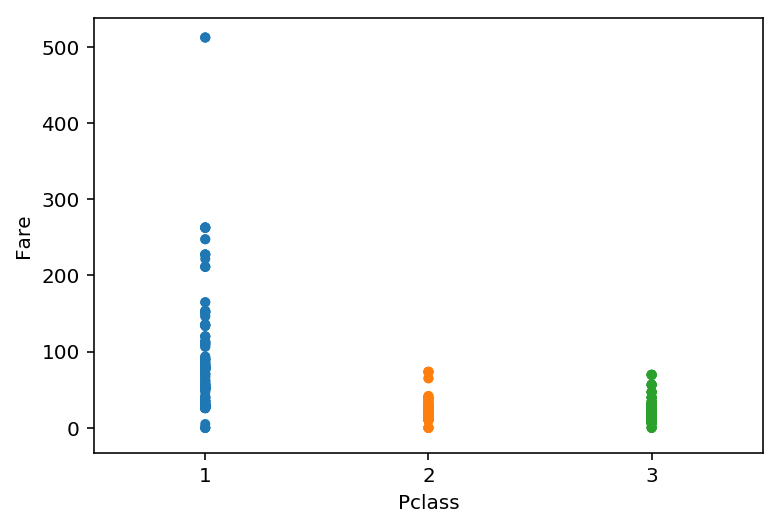

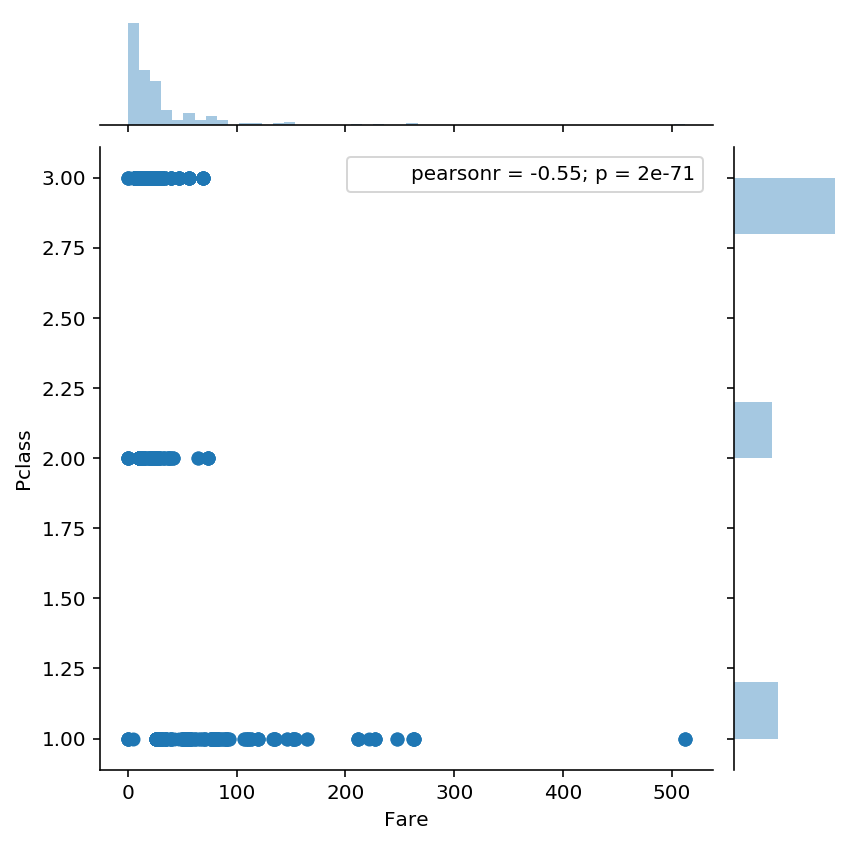

In [185]:
sns.stripplot(x="Pclass", y="Fare", data=df);
sns.jointplot(x="Fare", y="Pclass", data=df);

In [191]:
df['Family_Categoty'] = df['Family_Size'].map({0:'Single',1:'Small_Family', 2:'Small_Family',
                                              3:'Small_Family',4:'Small_Family', 5:'Big_Family', 
                                               6:'Big_Family', 7:'Big_Family', 8:'Big_Family',
                                               9:'Big_Family', 10:'Big_Family',})
df[46:67]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,All_Age,Has_Cabin,Family_Size,Family_Categoty
46,47,0,3,"Lennon, Mr. Denis",male,NaN,1,0,370371,15.5000,NaN,Q,1,28.0,0,1,Small_Family
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q,0,28.0,0,0,Single
48,49,0,3,"Samaan, Mr. Youssef",male,NaN,2,0,2662,21.6792,NaN,C,1,28.0,0,2,Small_Family
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S,0,18.0,0,1,Small_Family
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S,1,7.0,0,5,Big_Family
51,52,0,3,"Nosworthy, Mr. Richard Cater",male,21.0,0,0,A/4. 39886,7.8000,NaN,S,1,21.0,0,0,Single
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,0,49.0,1,1,Small_Family
53,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.0000,NaN,S,0,29.0,0,1,Small_Family
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,1,65.0,1,1,Small_Family
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S,1,28.0,1,0,Single
